In [138]:
import pandas as pd

df = pd.read_csv('air_quality_clean.csv')

In [139]:
print(df.head())

         Date  Air_Quality
0  2018-07-01          NaN
1  2018-07-02    44.375000
2  2018-07-03    56.650000
3  2018-07-04    53.681818
4  2018-07-05    62.875000


17:37:55 - cmdstanpy - INFO - Chain [1] start processing
17:37:55 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat
2181 2024-10-17   98.087041
2182 2024-10-18   98.034127
2183 2024-10-19   99.597887
2184 2024-10-20   98.204663
2185 2024-10-21  100.208639
2186 2024-10-22  103.188085
2187 2024-10-23  102.781391
2188 2024-10-24  104.123671
2189 2024-10-25  104.684932
2190 2024-10-26  106.867373


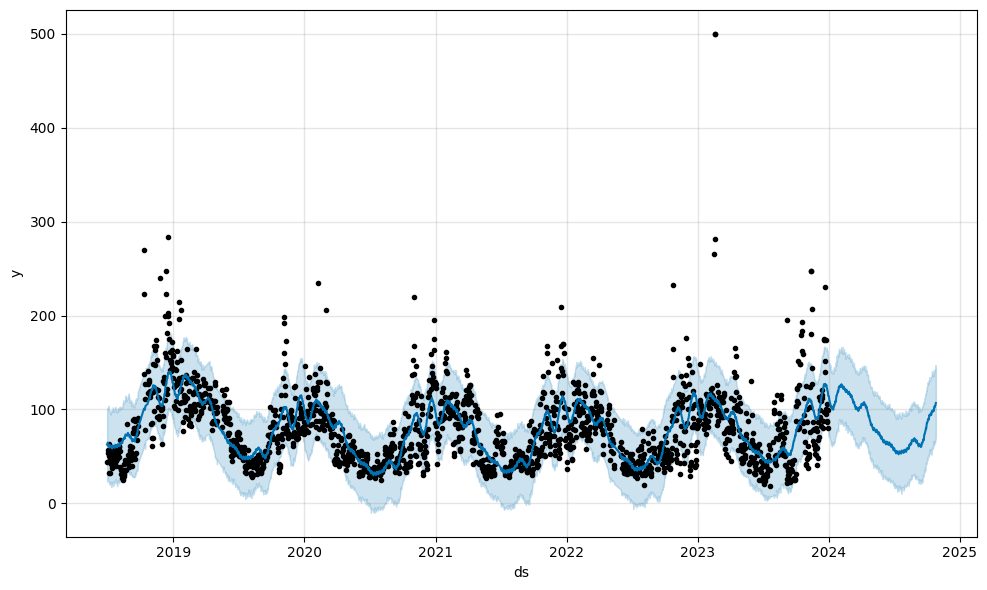

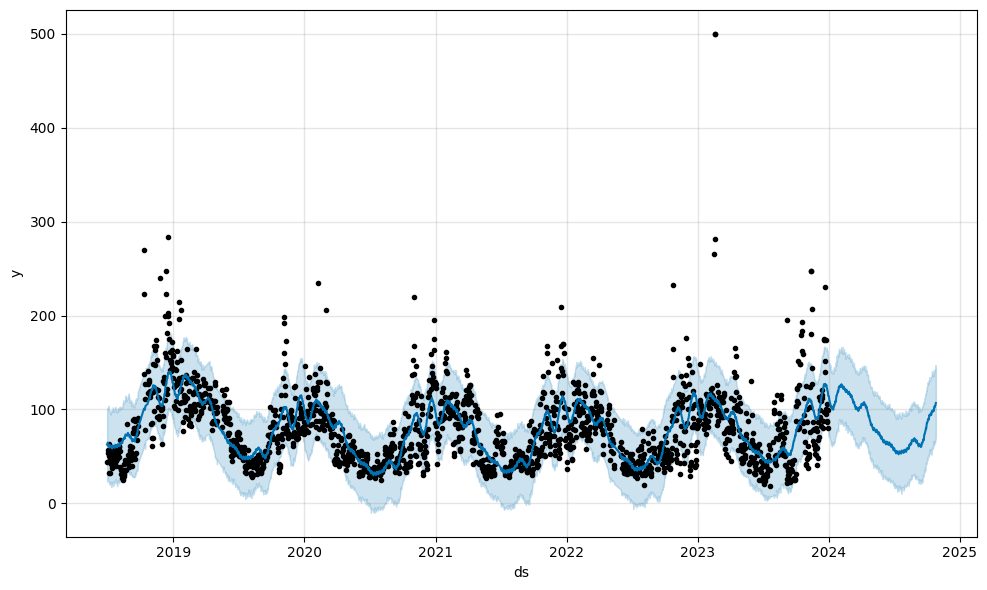

In [140]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['Date', 'Air_Quality']].rename(columns={'Date': 'ds', 'Air_Quality': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe to hold predictions for the next 10 days
future = model.make_future_dataframe(periods=300)

# Forecast
forecast = model.predict(future)

# Show forecasted values
print(forecast[['ds', 'yhat']].tail(10))

# Plot forecast
model.plot(forecast)

c:\ml models\forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ml models\forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ml models\forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA → MAE: 33.31, RMSE: 52.65


c:\ml models\forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ml models\forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


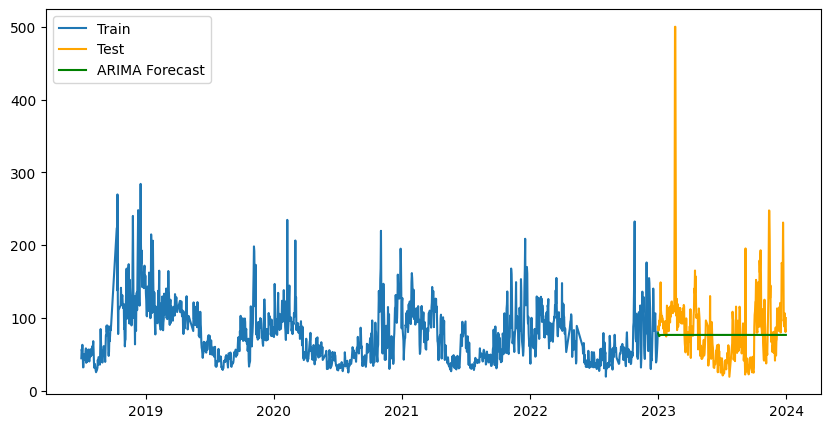

In [148]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('air_quality_clean.csv')

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index BEFORE interpolation
df = df.set_index('Date').sort_index()

# Fill missing values
df['Air_Quality'] = df['Air_Quality'].interpolate(method='time')

# Train-test split
train = df[df.index < '2023-01-01']
test = df[df.index >= '2023-01-01']

# Fit ARIMA (p,d,q)
model = ARIMA(train['Air_Quality'], order=(5,1,2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test['Air_Quality'], forecast)
rmse = np.sqrt(mean_squared_error(test['Air_Quality'], forecast))
print(f"ARIMA → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Air_Quality'], label='Train')
plt.plot(test.index, test['Air_Quality'], label='Test', color='orange')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')
plt.legend()
plt.show()


C:\Users\navat\AppData\Local\Temp\ipykernel_21720\1200496604.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Air_Quality'] = df['Air_Quality'].fillna(method='bfill').fillna(method='ffill')


Any NaNs left? Air_Quality    0
dtype: int64


c:\ml models\forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0050
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020
Epoch 12/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 13/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 14/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 15/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018
Epoch 16/20
95/95 ━

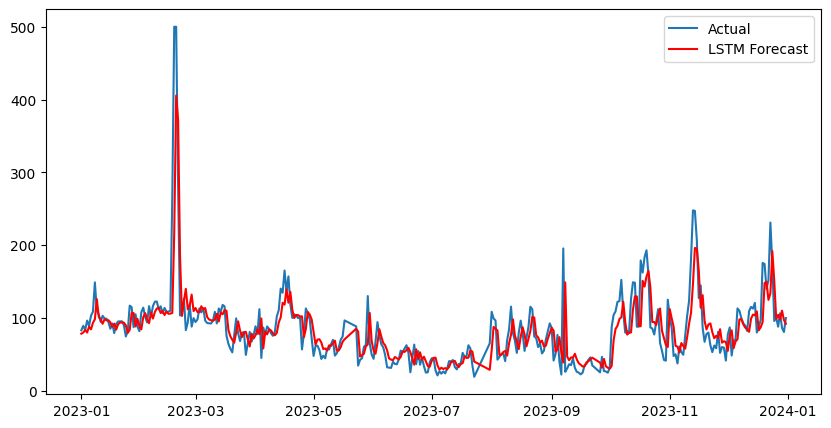

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load and prepare data
df = pd.read_csv('air_quality_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Fill missing values
df['Air_Quality'] = df['Air_Quality'].interpolate(method='time')
df['Air_Quality'] = df['Air_Quality'].fillna(method='bfill').fillna(method='ffill')

# Double-check for NaNs
print("Any NaNs left?", df.isna().sum())

# Scale data AFTER cleaning
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Air_Quality']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Train-test split (keep 2023 as test)
split_index = len(df[df.index < '2023-01-01']) - seq_length
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse scaling
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

dates_test = df.index[-len(y_test_inv):]

plt.figure(figsize=(10,5))
plt.plot(dates_test, y_test_inv, label='Actual')
plt.plot(dates_test, y_pred_inv, label='LSTM Forecast', color='red')
plt.legend()
plt.show()


XGBoost RMSE: 38.50


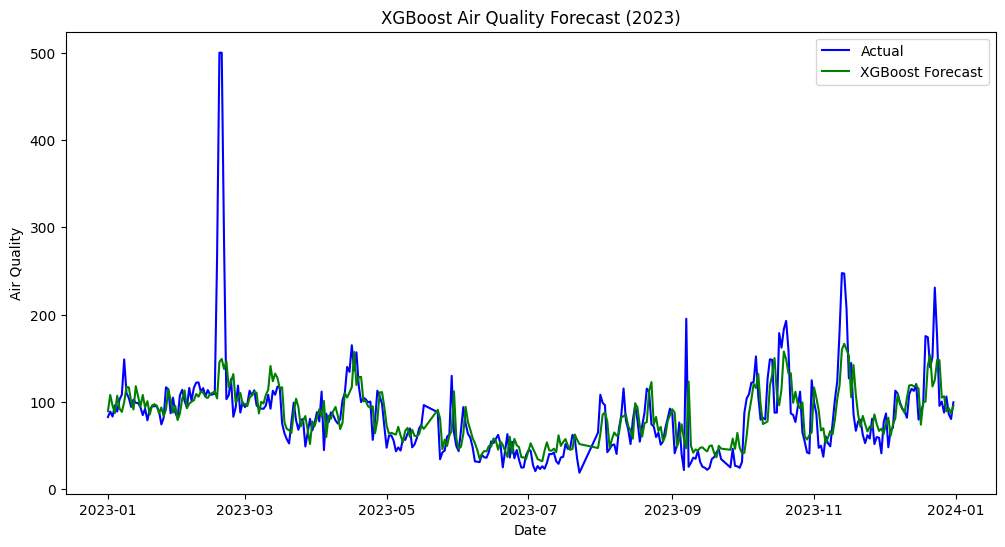

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load and prepare data
df = pd.read_csv('air_quality_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fill missing values
df['Air_Quality'] = df['Air_Quality'].interpolate()

# Create lag features
def create_lag_features(data, lags=30):
    df_lag = data.copy()
    for lag in range(1, lags+1):
        df_lag[f'lag_{lag}'] = df_lag['Air_Quality'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

df_lagged = create_lag_features(df, lags=30)

# Ensure index is datetime
df_lagged.index = pd.to_datetime(df_lagged.index)

# Train-test split
train = df_lagged.loc[:'2022']
test = df_lagged.loc['2023':]

X_train = train.drop('Air_Quality', axis=1)
y_train = train['Air_Quality']
X_test = test.drop('Air_Quality', axis=1)
y_test = test['Air_Quality']

# Train XGBoost
model_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Forecast', color='green')
plt.title('XGBoost Air Quality Forecast (2023)')
plt.xlabel('Date')
plt.ylabel('Air Quality')
plt.legend()
plt.show()


In [144]:
import numpy as np


if np.isnan(yhat):
    # Replace with mean of valid predictions, or zero, or any suitable value
    # Example: yhat = np.nanmean(y_pred_inv)
    yhat = np.nanmean(y_pred_inv)
    print("yhat was NaN, replaced with mean prediction:", yhat)
else:
    print("yhat is valid:", yhat)

yhat is valid: 84.64625


In [145]:
# Ensure 'Date' column exists
if 'Date' not in df.columns:
    df = df.reset_index()  # moves index to column if datetime index
    # Try to find the datetime column
    datetime_col = None
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.datetime64):
            datetime_col = col
            break
    if datetime_col is None:
        raise ValueError("No datetime column found in your dataframe.")
    df.rename(columns={datetime_col: 'Date'}, inplace=True)

# Now we are safe
df['Date'] = pd.to_datetime(df['Date'])
df_2023 = df[df['Date'].dt.year == 2023].copy()


In [146]:
# Remove rows with missing values in any column
df_compare = df_compare.dropna()


In [147]:
# Prepare comparison DataFrame for model predictions vs actuals

df_compare = pd.DataFrame({
    'Date': y_test.index,  # Use index for date
    'Actual': y_test.values,
    'LSTM': y_pred_inv.flatten(),
    'XGBoost': y_pred_xgb.flatten()
})
df_compare = df_compare.set_index('Date')

print(df_compare.head())

               Actual       LSTM     XGBoost
Date                                        
2023-01-01  82.750000  78.113869   89.368073
2023-01-02  88.958333  79.720856  107.994133
2023-01-03  83.291667  83.278824   95.711845
2023-01-04  96.125000  79.754311   87.169716
2023-01-05  89.000000  87.756279  107.037064
